In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *

In [2]:
df = pd.read_csv("survey_data.csv")
df.head()

,Age,Gender,Occupation,Education Level,Mobile Usage Hours,Primary Purpose,Mobile Addiction,Mental Health Rating,Mental Health Status,Mobile Impact on Well-being,Changes in Mental Health,Duration of Mobile Usage,Stress or Anxiety due to Mobile Usage,Screen Time Before Bed,Notification Preferences,Social Media Usage,Frequency of Physical Exercise,Sleep Quality,Work-Life Balance,Overall Life Satisfaction
0,18-24,Male,Unemployed,Bachelor's Degree,1-2 hours,Entertainment,Yes,9,Poor,No,Improved,Less than a year,Yes,Yes,Frequent,Never,Never,Good,Satisfied,9
1,45-54,Male,Other,Other,2-4 hours,Social media,Yes,7,Fair,Yes,Improved,2-5 years,Yes,Yes,Minimal,Daily,Monthly,Poor,Dissatisfied,1
2,45-54,Male,Other,High School or equivalent,More than 6 hours,Work-related tasks,No,10,Poor,Yes,Improved,1-2 years,No,Yes,Frequent,Daily,Rarely,Poor,Dissatisfied,6
3,25-34,Female,Unemployed,Bachelor's Degree,2-4 hours,Social media,Yes,9,Good,No,Worsened,2-5 years,Yes,No,Frequent,Weekly,Daily,Poor,Dissatisfied,5
4,18-24,Male,Unemployed,Bachelor's Degree,4-6 hours,Communication,No,3,Good,Yes,Remained the same,2-5 years,No,No,Minimal,Weekly,Weekly,Poor,Satisfied,1


In [3]:
df.shape

(175, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Age                                    175 non-null    object
 1   Gender                                 175 non-null    object
 2   Occupation                             175 non-null    object
 3   Education Level                        175 non-null    object
 4   Mobile Usage Hours                     175 non-null    object
 5   Primary Purpose                        175 non-null    object
 6   Mobile Addiction                       175 non-null    object
 7   Mental Health Rating                   175 non-null    int64 
 8   Mental Health Status                   175 non-null    object
 9   Mobile Impact on Well-being            175 non-null    object
 10  Changes in Mental Health               175 non-null    object
 11  Duration of Mobile 

In [5]:
df.isnull().sum()

Age                                      0
Gender                                   0
Occupation                               0
Education Level                          0
Mobile Usage Hours                       0
Primary Purpose                          0
Mobile Addiction                         0
Mental Health Rating                     0
Mental Health Status                     0
Mobile Impact on Well-being              0
Changes in Mental Health                 0
Duration of Mobile Usage                 0
Stress or Anxiety due to Mobile Usage    0
Screen Time Before Bed                   0
Notification Preferences                 0
Social Media Usage                       0
Frequency of Physical Exercise           0
Sleep Quality                            0
Work-Life Balance                        0
Overall Life Satisfaction                0
dtype: int64

In [6]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Frequency distribution for {column}:\n{df[column].value_counts()}\n")

Frequency distribution for Age:
Age
35-44           42
45-54           39
55 and above    34
18-24           30
25-34           30
Name: count, dtype: int64

Frequency distribution for Gender:
Gender
Male      89
Female    86
Name: count, dtype: int64

Frequency distribution for Occupation:
Occupation
Unemployed    54
Other         51
Student       38
Employed      32
Name: count, dtype: int64

Frequency distribution for Education Level:
Education Level
Bachelor's Degree            41
Doctoral Degree              36
Master's Degree              36
High School or equivalent    33
Other                        29
Name: count, dtype: int64

Frequency distribution for Mobile Usage Hours:
Mobile Usage Hours
4-6 hours            40
1-2 hours            36
2-4 hours            36
More than 6 hours    33
Less than 1 hour     30
Name: count, dtype: int64

Frequency distribution for Primary Purpose:
Primary Purpose
Social media          41
Communication         37
Work-related tasks    35
Other  

In [7]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

for column in numerical_columns:
    print(f"Descriptive statistics for {column}:\n{df[column].describe()}\n")

Descriptive statistics for Mental Health Rating:
count    175.000000
mean       5.571429
std        2.841459
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Mental Health Rating, dtype: float64

Descriptive statistics for Overall Life Satisfaction:
count    175.000000
mean       5.897143
std        2.882915
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Overall Life Satisfaction, dtype: float64



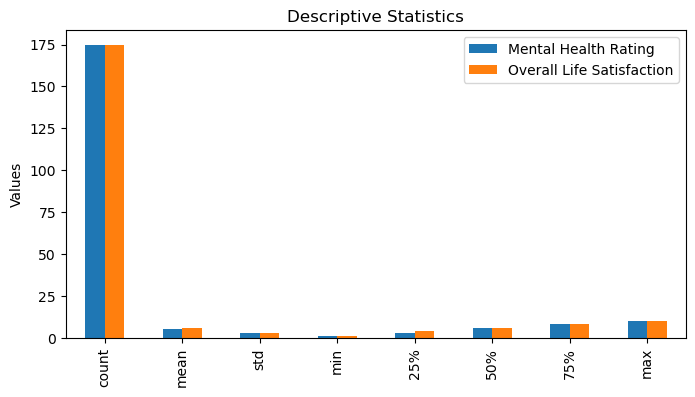

In [8]:
statistics = df.describe()
statistics.plot(kind='bar', figsize=(8, 4))
plt.title('Descriptive Statistics')
plt.ylabel('Values')
plt.show()

In [9]:
df.describe()

,Mental Health Rating,Overall Life Satisfaction
count,175.000000,175.000000
mean,5.571429,5.897143
std,2.841459,2.882915
min,1.000000,1.000000
25%,3.000000,4.000000
50%,6.000000,6.000000
75%,8.000000,8.000000
max,10.000000,10.000000


# corelation

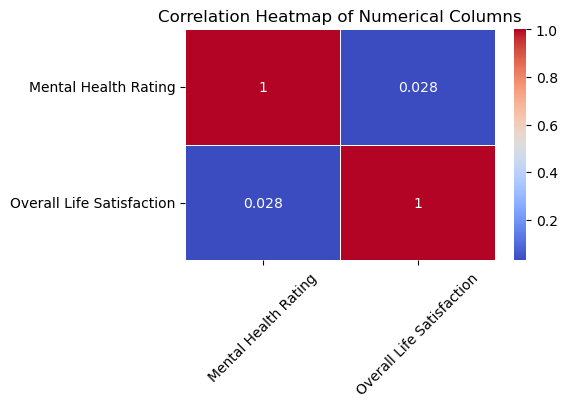

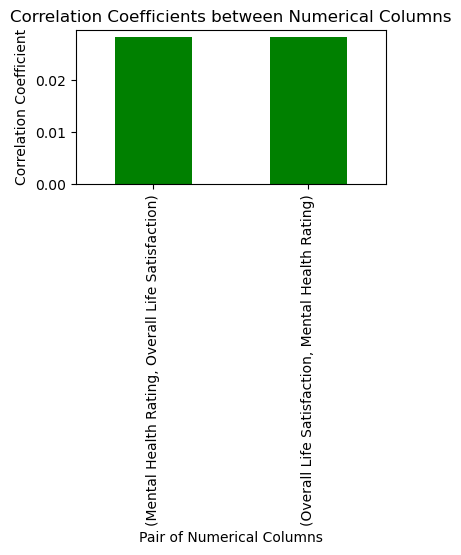

In [10]:
# Assuming df is your DataFrame and you want to include only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation analysis
correlation_matrix = df[numerical_columns].corr()
# Visualization - Correlation Heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.xticks(rotation=45)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Assuming df is your DataFrame and numerical_columns is a list of numerical column names
correlation_matrix = df[numerical_columns].corr()

# Extracting correlation coefficients
correlation_values = correlation_matrix.unstack().sort_values()

# Removing duplicate entries and self-correlations
correlation_values = correlation_values[correlation_values != 1]

# Plotting bar graph
plt.figure(figsize=(4, 2))
correlation_values.plot(kind='bar', color='green')
plt.xlabel('Pair of Numerical Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Numerical Columns')
plt.xticks(rotation=90)
plt.show()


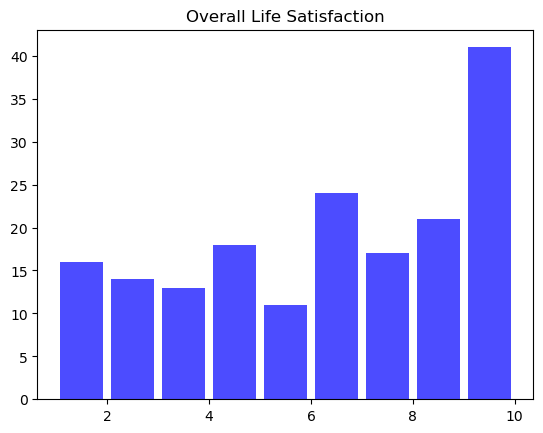

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['Overall Life Satisfaction'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Overall Life Satisfaction')
plt.show()


# Chi-square test

C:\Users\HP\AppData\Local\Temp\ipykernel_13288\2545798060.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(p_values.keys(), rotation=45, ha='right')


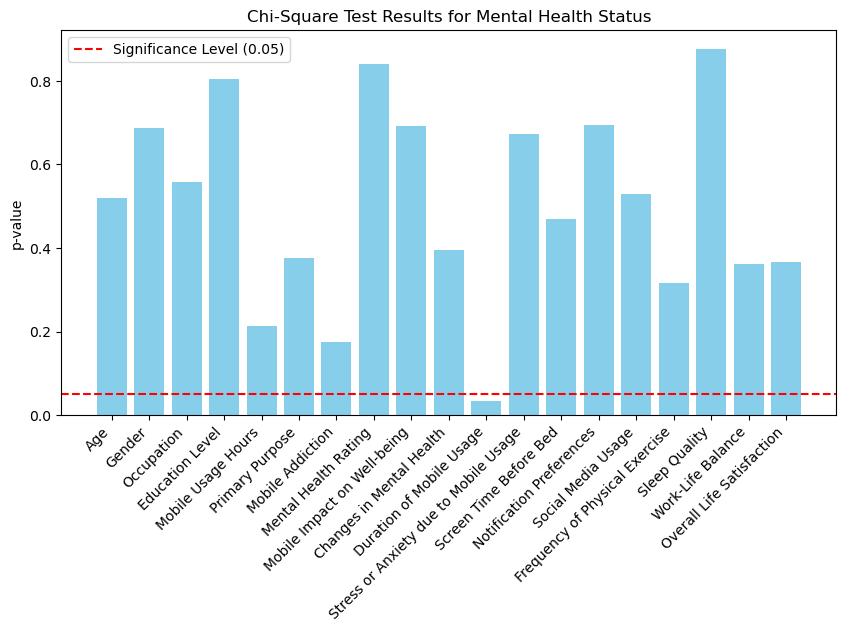

In [12]:
def chi_square_test(column):
    contingency_table = pd.crosstab(df[column], df['Mental Health Status'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

# Perform chi-square test on all columns
p_values = {}
for column in df.columns:
    if column != 'Mental Health Status':
        p_values[column] = chi_square_test(column)

# Draw results
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(p_values.keys(), p_values.values(), color='skyblue')
ax.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
ax.set_xticklabels(p_values.keys(), rotation=45, ha='right')
ax.set_ylabel('p-value')
ax.set_title('Chi-Square Test Results for Mental Health Status')
ax.legend()
plt.show()

Chi-square test results for 'Mental Health Status' vs 'Duration of Mobile Usage':
Chi-square statistic: 13.649714664307783
P-value: 0.03380342501649268



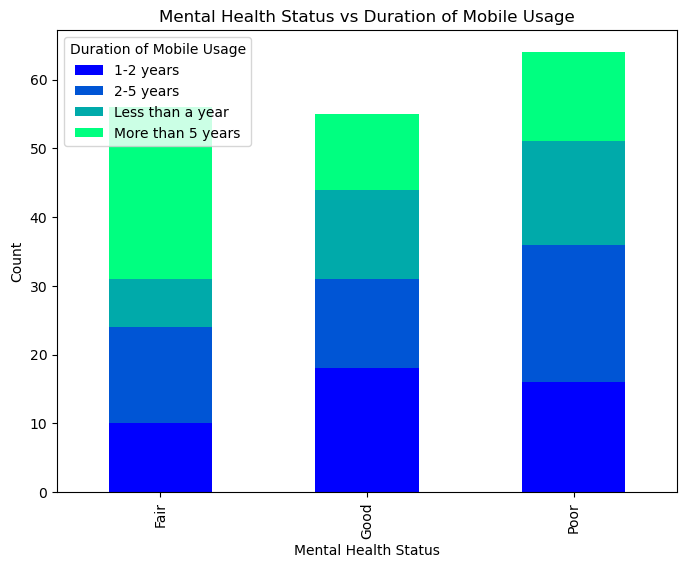

In [13]:
# Chi-square test for 'Gender' vs 'Mobile Addiction'
contingency_table = pd.crosstab(df['Mental Health Status'], df['Duration of Mobile Usage'])

chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square test results for 'Mental Health Status' vs 'Duration of Mobile Usage':")
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value_chi2}\n")

contingency_table.plot(kind='bar', stacked=True, colormap='winter', figsize=(8, 6))
plt.title('Mental Health Status vs Duration of Mobile Usage')
plt.xlabel('Mental Health Status')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13288\1278382949.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(p_values.keys(), rotation=45, ha='right')


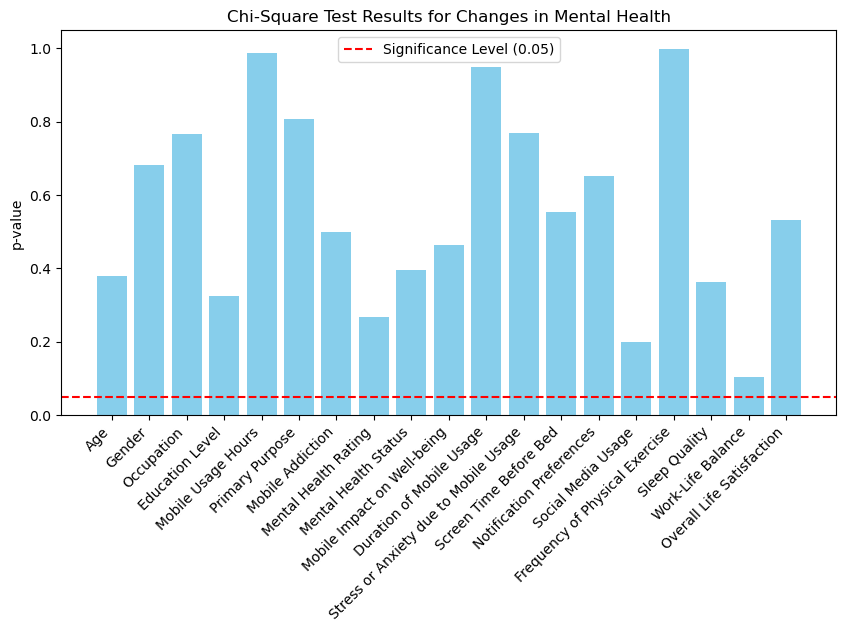

In [14]:
def chi_square_test(column):
    contingency_table = pd.crosstab(df[column], df['Changes in Mental Health'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

# Perform chi-square test on all columns
p_values = {}
for column in df.columns:
    if column != 'Changes in Mental Health':
        p_values[column] = chi_square_test(column)

# Draw results
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(p_values.keys(), p_values.values(), color='skyblue')
ax.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
ax.set_xticklabels(p_values.keys(), rotation=45, ha='right')
ax.set_ylabel('p-value')
ax.set_title('Chi-Square Test Results for Changes in Mental Health')
ax.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13288\2928719359.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(p_values.keys(), rotation=45, ha='right')


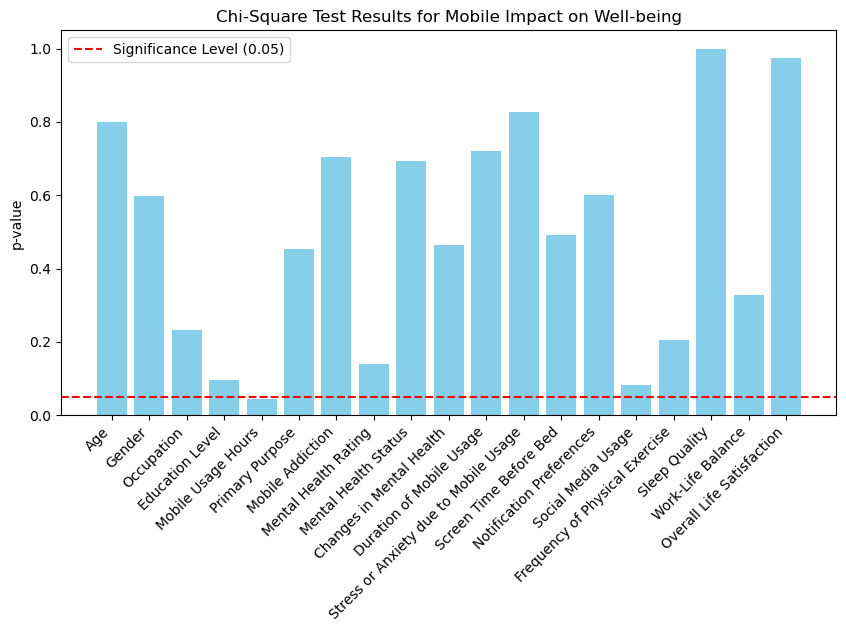

In [15]:
def chi_square_test(column):
    contingency_table = pd.crosstab(df[column], df['Mobile Impact on Well-being'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

# Perform chi-square test on all columns
p_values = {}
for column in df.columns:
    if column != 'Mobile Impact on Well-being':
        p_values[column] = chi_square_test(column)

# Draw results
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(p_values.keys(), p_values.values(), color='skyblue')
ax.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
ax.set_xticklabels(p_values.keys(), rotation=45, ha='right')
ax.set_ylabel('p-value')
ax.set_title('Chi-Square Test Results for Mobile Impact on Well-being')
ax.legend()
plt.show()

Chi-square test results for 'Mobile Impact on Well-being' vs 'Mobile Usage Hours':
Chi-square statistic: 9.750159642401023
P-value: 0.04485320759841834



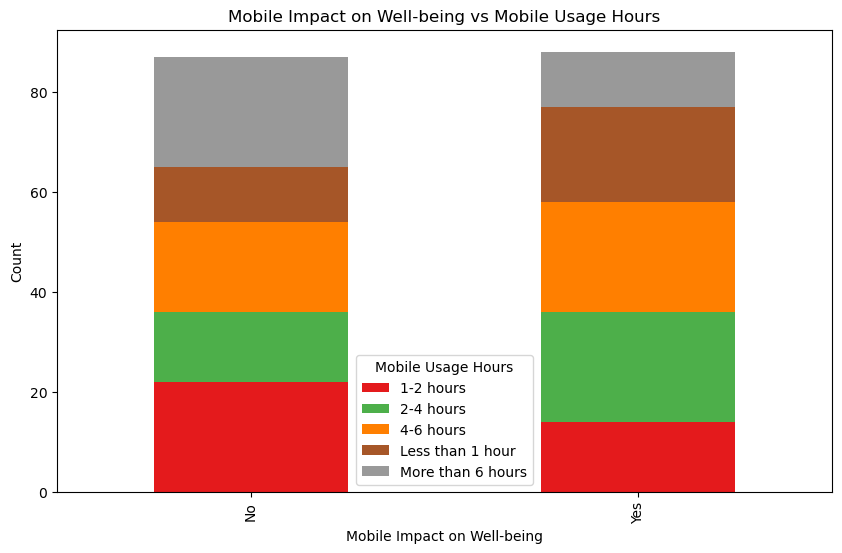

In [16]:
# Chi-square test for 'Education Level' and 'Mobile Addiction'
contingency_table_education_mobile = pd.crosstab(df['Mobile Impact on Well-being'], df['Mobile Usage Hours'])

chi2_stat_education_mobile, p_value_education_mobile, _, _ = chi2_contingency(contingency_table_education_mobile)

print(f"Chi-square test results for 'Mobile Impact on Well-being' vs 'Mobile Usage Hours':")
print(f"Chi-square statistic: {chi2_stat_education_mobile}")
print(f"P-value: {p_value_education_mobile}\n")

contingency_table_education_mobile.plot(kind='bar', stacked=True, colormap='Set1', figsize=(10, 6))
plt.title('Mobile Impact on Well-being vs Mobile Usage Hours')
plt.xlabel('Mobile Impact on Well-being')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13288\2167904724.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(p_values.keys(), rotation=45, ha='right')


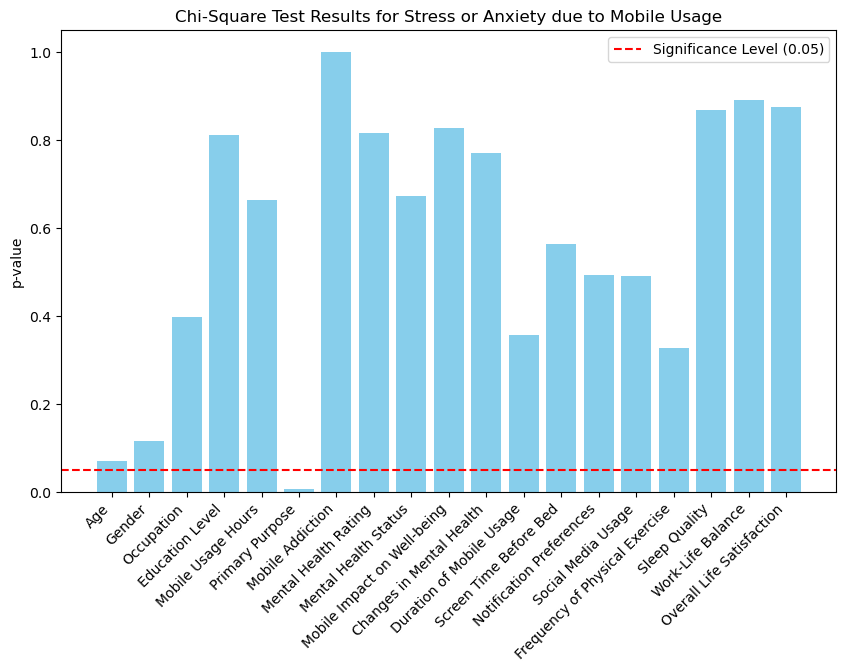

In [17]:
def chi_square_test(column):
    contingency_table = pd.crosstab(df[column], df['Stress or Anxiety due to Mobile Usage'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

# Perform chi-square test on all columns
p_values = {}
for column in df.columns:
    if column != 'Stress or Anxiety due to Mobile Usage':
        p_values[column] = chi_square_test(column)

# Draw results
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(p_values.keys(), p_values.values(), color='skyblue')
ax.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
ax.set_xticklabels(p_values.keys(), rotation=45, ha='right')
ax.set_ylabel('p-value')
ax.set_title('Chi-Square Test Results for Stress or Anxiety due to Mobile Usage')
ax.legend()
plt.show()

Chi-square test results for 'Stress or Anxiety due to Mobile Usage' vs 'Primary Purpose':
Chi-square statistic: 14.618337817596128
P-value: 0.005561934409185019



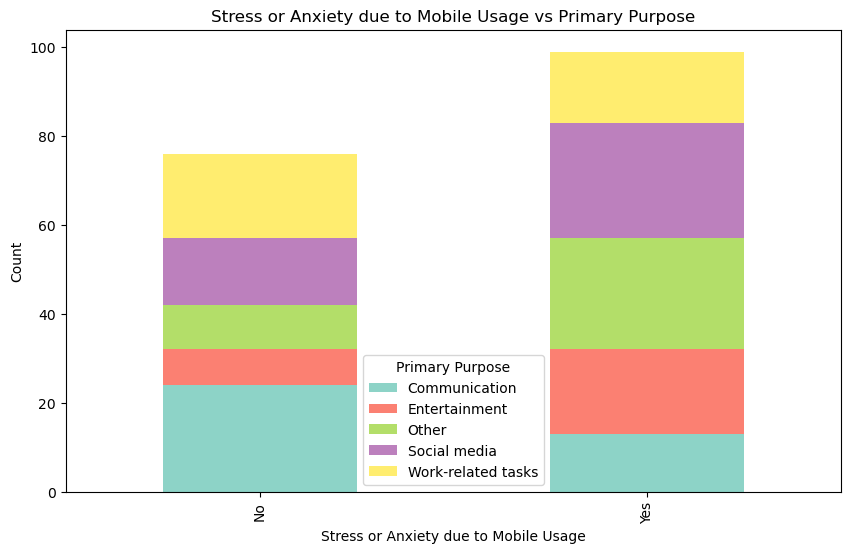

In [18]:
# Chi-square test for 'Education Level' and 'Mobile Addiction'
contingency_table_education_mobile = pd.crosstab(df['Stress or Anxiety due to Mobile Usage'], df['Primary Purpose'])

chi2_stat_education_mobile, p_value_education_mobile, _, _ = chi2_contingency(contingency_table_education_mobile)

print(f"Chi-square test results for 'Stress or Anxiety due to Mobile Usage' vs 'Primary Purpose':")
print(f"Chi-square statistic: {chi2_stat_education_mobile}")
print(f"P-value: {p_value_education_mobile}\n")

contingency_table_education_mobile.plot(kind='bar', stacked=True, colormap='Set3', figsize=(10, 6))
plt.title('Stress or Anxiety due to Mobile Usage vs Primary Purpose')
plt.xlabel('Stress or Anxiety due to Mobile Usage')
plt.ylabel('Count')
plt.show()

# ANOVA test

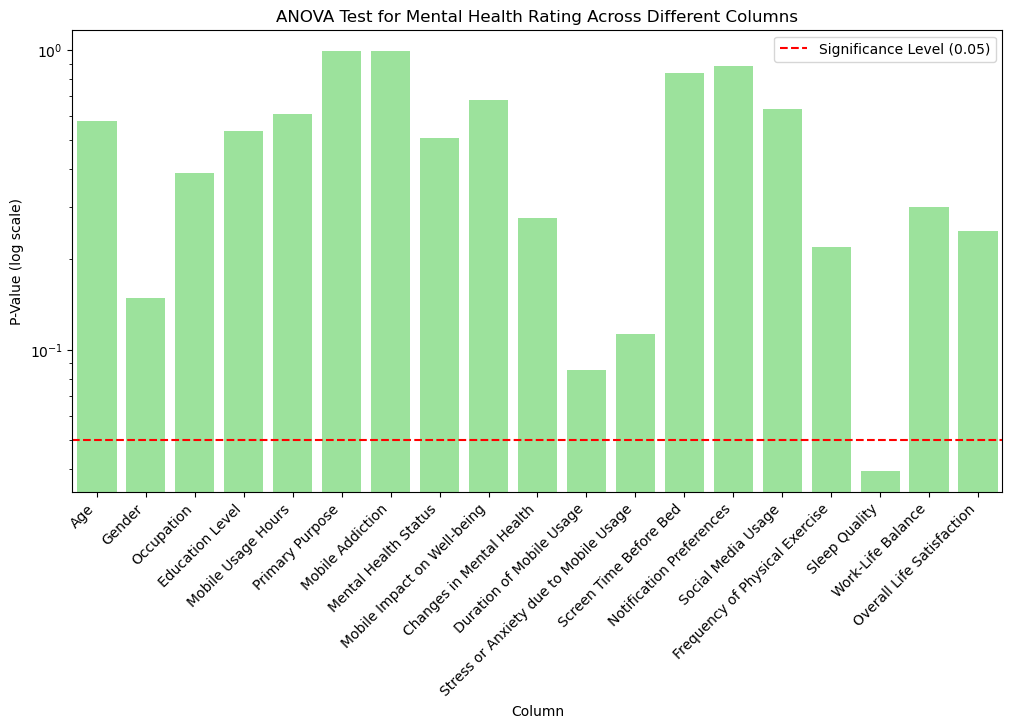

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Assuming df is your DataFrame
columns_of_interest = df.columns[df.columns != 'Mental Health Rating']

# Empty lists to store results
f_stats = []
p_values = []

# ANOVA test for each column
for column in columns_of_interest:
    unique_levels = df[column].unique()
    groups = [df[df[column] == level]['Mental Health Rating'] for level in unique_levels]

    f_stat, p_value_anova = f_oneway(*groups)
    f_stats.append(f_stat)
    p_values.append(p_value_anova)

# Creating a DataFrame for easier plotting
results_df_anova = pd.DataFrame({'Column': columns_of_interest, 'F-Statistic': f_stats, 'P-Value': p_values})

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='P-Value', data=results_df_anova, color='lightgreen')
plt.yscale('log')  # Use log scale for better visualization of p-values
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title('ANOVA Test for Mental Health Rating Across Different Columns')
plt.xlabel('Column')
plt.ylabel('P-Value (log scale)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


ANOVA test results for 'Sleep Quality' and 'Mental Health Rating':
F-statistic: 4.303164010378937
P-value: 0.03952229259254885



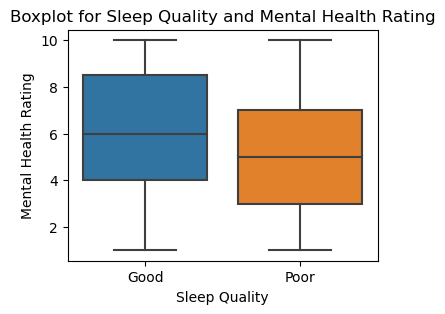

In [20]:
# ANOVA test for 'Sleep Quality' and 'Mental Health Rating'
social_media_levels = df['Sleep Quality'].unique()
social_media_groups = [df[df['Sleep Quality'] == level]['Mental Health Rating'] for level in social_media_levels]
f_stat_social_media, p_value_social_media = f_oneway(*social_media_groups)

print(f"ANOVA test results for 'Sleep Quality' and 'Mental Health Rating':")
print(f"F-statistic: {f_stat_social_media}")
print(f"P-value: {p_value_social_media}\n")

plt.figure(figsize=(4, 3))
sns.boxplot(x='Sleep Quality', y='Mental Health Rating', data=df)
plt.title('Boxplot for Sleep Quality and Mental Health Rating')
plt.show()

# Kruskal-Wallis

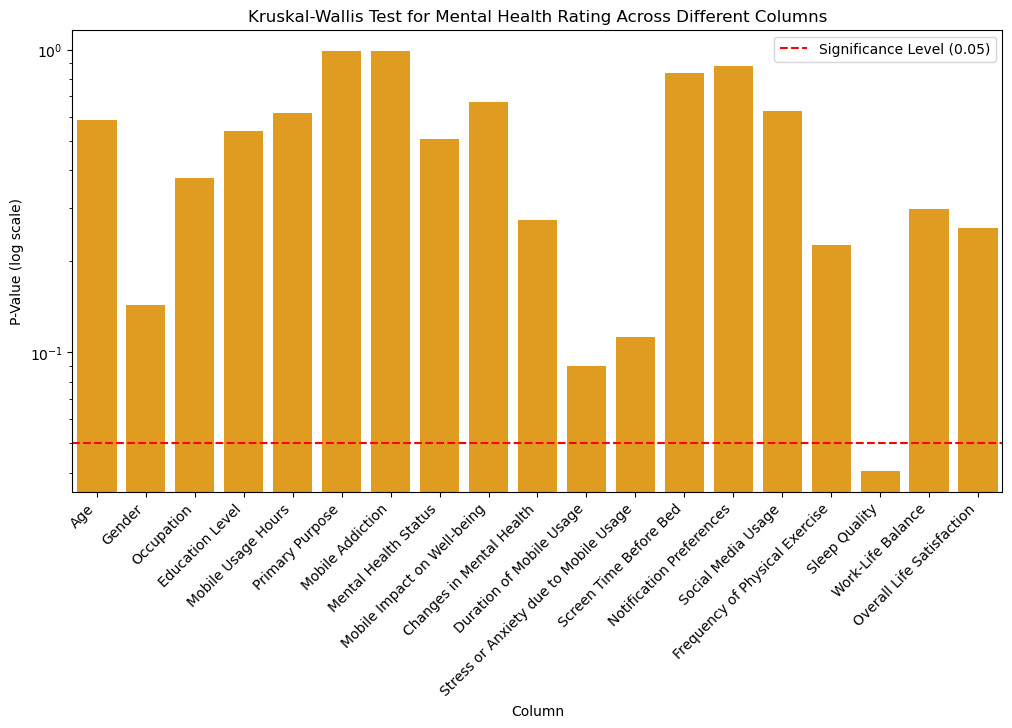

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Assuming df is your DataFrame
columns_of_interest = df.columns[df.columns != 'Mental Health Rating']

# Empty lists to store results
h_stats = []
p_values = []

# Kruskal-Wallis test for each column
for column in columns_of_interest:
    unique_levels = df[column].unique()
    groups = [df[df[column] == level]['Mental Health Rating'] for level in unique_levels]

    h_stat, p_value_kruskal = kruskal(*groups)
    h_stats.append(h_stat)
    p_values.append(p_value_kruskal)

# Creating a DataFrame for easier plotting
results_df = pd.DataFrame({'Column': columns_of_interest, 'H-Statistic': h_stats, 'P-Value': p_values})

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='P-Value', data=results_df, color='orange')
plt.yscale('log')  # Use log scale for better visualization of p-values
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title('Kruskal-Wallis Test for Mental Health Rating Across Different Columns')
plt.xlabel('Column')
plt.ylabel('P-Value (log scale)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


Kruskal-Wallis test results for 'Mental Health Rating' among Sleep Quality:
H-statistic: 4.190693085122569
P-value: 0.04064647656583931



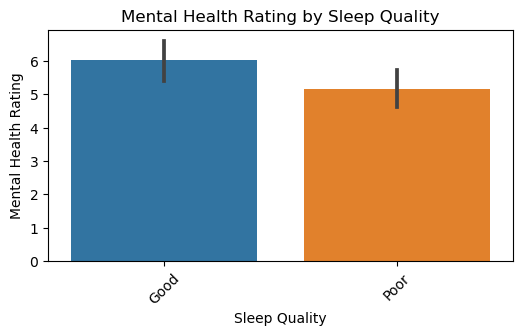

In [22]:
# Kruskal-Wallis test for 'Mental Health Rating' among Sleep Quality
occupation_levels = df['Sleep Quality'].unique()
occupation_groups = [df[df['Sleep Quality'] == occupation]['Mental Health Rating'] for occupation in occupation_levels]
h_stat, p_value_kruskal = kruskal(*occupation_groups)

print(f"Kruskal-Wallis test results for 'Mental Health Rating' among Sleep Quality:")
print(f"H-statistic: {h_stat}")
print(f"P-value: {p_value_kruskal}\n")

plt.figure(figsize=(6, 3))
sns.barplot(x='Sleep Quality', y='Mental Health Rating', data=df)
plt.title('Mental Health Rating by Sleep Quality')
plt.xticks(rotation=45)
plt.show()